In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
reviews = pd.read_csv('Datasets/reviews.csv')
reviews.drop('app_id', axis=1, inplace=True)
reviews.head()

,app_name,review_text,review_score,review_votes
0,Counter-Strike,Ruined my life.,1,0
1,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,Counter-Strike,This game saved my virginity.,1,0
3,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,Counter-Strike,"Easy to learn, hard to master.",1,1


In [11]:
reviews.sample(10)

,app_name,review_text,review_score,review_votes
2058183,War Thunder,-Playing as a Soviet tank -Begin shooting fell...,1,1
3890490,Train Fever,when i first booted the game it was ok second ...,1,0
3655793,The Witcher 3: Wild Hunt,Very good game. This will be GOTY for sure.,1,0
37827,Orcs Must Die!,Damn this game is fun! The art style is perfec...,1,0
4871756,DARK SOULS™ III,This game takes most of the great ♥♥♥♥ from th...,1,0
789846,Batman™: Arkham Origins,The only reason I recommend this game is for t...,1,0
5469160,Factorio,Early Access Review,1,0
122796,Terraria,Very exciting while playing with friends :),1,0
86124,Terraria,it's the best game ever!! :D,1,0
6012545,ICEY,"The art is great, the combat animations are fl...",1,0


In [12]:
reviews.describe()

,review_score,review_votes
count,6.417106e+06,6.417106e+06
mean,6.394992e-01,1.472446e-01
std,7.687918e-01,3.543496e-01
min,-1.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00
50%,1.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00


In [13]:
print(reviews['review_score'].value_counts())
print()
print(reviews['review_votes'].value_counts())

 1    5260420
-1    1156686
Name: review_score, dtype: int64

0    5472222
1     944884
Name: review_votes, dtype: int64


### Weighted review score
In order to give a proper score for each game, it would not be appropriate to just calculate the average (since in the case where an average of 1.0 across 1 review is against an average of 0.95 across 100 reviews, the latter would be considered better). Therefore an appropriate formula need to be chosen to calculate this. This [blog post](https://steamdb.info/blog/steamdb-rating/) gives a solution to this.

In [14]:
positive_reviews = reviews[reviews['review_score']==1].groupby('app_name').count()

In [15]:
# count and mean of review_score_and_votes grouped by game
reviews_by_group = reviews.groupby(reviews["app_name"]).review_score.agg(["count","mean"])
positive_reviews = reviews[reviews['review_score']==1].groupby('app_name').count()['review_score']
reviews_by_group['positive_rate'] = positive_reviews/reviews_by_group['count']
reviews_by_group.sample(5)

,count,mean,positive_rate
app_name,,,
DinoSystem,102,0.725490,0.862745
Rulers of Nations,59,-0.186441,0.406780
Next Stop 2,2,0.000000,0.500000
There Came an Echo,218,0.568807,0.784404
Don't open the doors!,20,0.600000,0.800000


In [16]:
import math 

def calc_weighted_score(rate, total):
    return rate - (rate - 0.5) * math.pow(2, -math.log10(total+1))

weighted_score = []
for r, t in zip(reviews_by_group['positive_rate'], reviews_by_group['count']):
    weighted_score.append(calc_weighted_score(r, t))
reviews_by_group['weighted_score'] = weighted_score
reviews_by_group.sample(5)

,count,mean,positive_rate,weighted_score
app_name,,,,
The Labyrinth of Grisaia,33,0.696970,0.848485,0.727936
Chill the Piro,4,1.000000,1.000000,0.691994
Suppressed,3,1.000000,1.000000,0.670594
e-River Cabin Journal,29,0.034483,0.517241,0.511048
The Asskickers,22,-0.363636,0.318182,0.388930


### Analyzing new features

In [17]:
reviews_by_group.sort_values('weighted_score',ascending=False)[:10]

,count,mean,positive_rate,weighted_score
app_name,,,,
Portal 2,38924,0.975542,0.987771,0.967521
Sid Meier's Civilization V,8693,0.999310,0.999655,0.967083
Half-Life 2,6483,0.999075,0.999537,0.963967
Factorio,12553,0.977854,0.988927,0.960391
South Park™: The Stick of Truth™,3479,0.997700,0.998850,0.956010
Portal,16293,0.963174,0.981587,0.955602
The Binding of Isaac: Rebirth,23306,0.957264,0.978632,0.955444
Terraria,84828,0.941576,0.970788,0.955329
"Star Wars: Battlefront 2 (Classic, 2005)",2976,1.000000,1.000000,0.954995


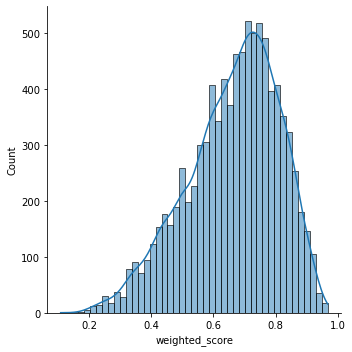

In [18]:
sns.displot(reviews_by_group['weighted_score'], kde=True)

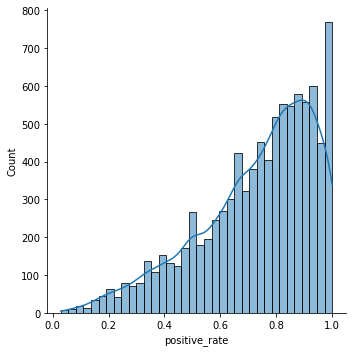

In [20]:
sns.displot(reviews_by_group['positive_rate'], kde=True)

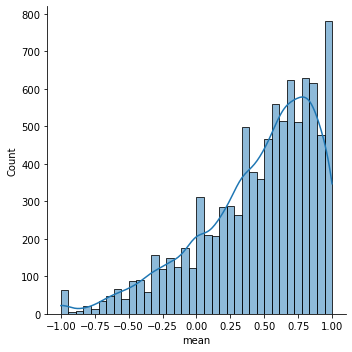

In [21]:
sns.displot(reviews_by_group['mean'], kde=True)

In [22]:
reviews_by_group.describe()

,count,mean,positive_rate,weighted_score
count,9363.000000,9363.000000,9300.000000,9300.000000
mean,665.798569,0.454357,0.732104,0.663343
std,3187.723508,0.428824,0.206585,0.147244
min,1.000000,-1.000000,0.029412,0.108476
25%,18.000000,0.200000,0.608905,0.571727
50%,58.000000,0.555556,0.778470,0.683278
75%,244.000000,0.788235,0.894737,0.772497
max,88973.000000,1.000000,1.000000,0.967521


In [19]:
reviews_by_group.to_csv('Datasets/reviews_processed.csv', index=True)